# Fuse results

In [ ]:
    
from joblib import dump, load
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..', '..')) # or the path to your source code
sys.path.insert(0, module_path)
from src.utils import load_iemocap, load_meld, load_emodb, load_ravdess, load_tess, load_crema_d, filter_emotions

iemocap = filter_emotions(load_iemocap())
meld = filter_emotions(load_meld())
meld_train = filter_emotions(load_meld(split='train'))
emodb = filter_emotions(load_emodb())
ravdess = filter_emotions(load_ravdess())
tess = filter_emotions(load_tess())
crema_d = filter_emotions(load_crema_d())

llm_preds = pd.read_csv("MELD_Utt_ZeroShot.csv")

def decision_fuse(text_pred, speech_pred):
    if text_pred == speech_pred:
        return text_pred
    if text_pred == 'neutral' and speech_pred != 'neutral':
        return speech_pred
    elif speech_pred == 'neutral' and text_pred != 'neutral':
        return text_pred
    else:
        return text_pred



Subfolders in the dataset: ['IEMOCAP_full_release']
Subfolders in the dataset: ['JSON files', 'MELD.Raw']
Subfolders in the raw data: ['dia47_utt11.mp4', 'dia35_utt2.mp4', 'dia47_utt9.mp4', 'dia167_utt14.mp4', 'dia232_utt4.mp4', '._dia118_utt11.mp4', 'dia34_utt2.mp4', 'dia268_utt8.mp4', 'dia233_utt4.mp4', '._dia39_utt1.mp4', '._dia230_utt3.mp4', 'dia137_utt0.mp4', '._dia268_utt11.mp4', '._dia231_utt3.mp4', 'dia136_utt0.mp4', '._dia38_utt1.mp4', '._dia34_utt16.mp4', '._dia128_utt2.mp4', 'dia28_utt7.mp4', 'dia195_utt8.mp4', 'dia22_utt15.mp4', '._dia129_utt2.mp4', '._dia100_utt5.mp4', 'dia29_utt7.mp4', 'dia103_utt2.mp4', 'final_videos_testdia48_utt3.mp4', 'dia154_utt12.mp4', '._dia95_utt11.mp4', '._dia205_utt1.mp4', 'dia102_utt2.mp4', 'dia107_utt8.mp4', 'dia253_utt11.mp4', '._dia52_utt5.mp4', 'dia175_utt3.mp4', 'dia93_utt0.mp4', '._dia272_utt0.mp4', '._dia192_utt5.mp4', 'dia174_utt3.mp4', '._dia53_utt5.mp4', 'dia175_utt13.mp4', 'dia92_utt0.mp4', 'dia191_utt2.mp4', 'dia77_utt1.mp4', 'dia25

In [3]:
llm_preds

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename,label,text,pred_gemma3,pred_gemma2,pred_gemma,pred_glm4,pred_qwen
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378",/Users/krazmic/.cache/kagglehub/datasets/bhand...,surprise,Why do all your coffee mugs have numbers on t...,surprise,neutral,neutral,neutral,neutral
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385",/Users/krazmic/.cache/kagglehub/datasets/bhand...,angry,"Uh, at some Monica can keep track. That way, ...",surprise,neutral,happy,neutral,happy
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520",/Users/krazmic/.cache/kagglehub/datasets/bhand...,neutral,You know what?,neutral,neutral,neutral,neutral,neutral
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146",/Users/krazmic/.cache/kagglehub/datasets/bhand...,neutral,"Come on, lady, you can do it. Push.",happy,happy,neutral,happy,neutral
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833",/Users/krazmic/.cache/kagglehub/datasets/bhand...,happy,Push,angry,surprise,neutral,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,2760,"Yeah, I mean, come on Ross, no one will even n...",Rachel,neutral,neutral,279,11,6,4,"00:14:35,457","00:14:40,211",/Users/krazmic/.cache/kagglehub/datasets/bhand...,neutral,"Yeah, I mean, come on, Ross, no one will even...",disgust,neutral,neutral,disgust,neutral
2606,2761,They’re not listening too me?,Ross,surprise,negative,279,12,6,4,"00:14:42,256","00:14:43,840",/Users/krazmic/.cache/kagglehub/datasets/bhand...,surprise,They're not listening to me.,sad,angry,angry,surprise,angry
2607,2762,Of course they’re listening to you! Everybody ...,Rachel,neutral,neutral,279,13,6,4,"00:14:44,008","00:14:48,511",/Users/krazmic/.cache/kagglehub/datasets/bhand...,neutral,Of course they're listening to you. Everybody...,happy,happy,happy,happy,happy
2608,2763,Monica you really think I should try this phas...,Ross,neutral,neutral,279,14,6,4,"00:14:48,138","00:14:52,390",/Users/krazmic/.cache/kagglehub/datasets/bhand...,neutral,"Monica, you really think I should try this fa...",fear,neutral,surprise,neutral,neutral


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
from src.evaluation import plot_confusion_matrix
meld_feats = pd.read_csv("MELD_GeMAPS.csv")
iemocap_feats = pd.read_csv("IEMOCAP_GeMAPS.csv")

              precision    recall  f1-score   support

       angry       0.33      0.06      0.11       345
     disgust       0.00      0.00      0.00        68
        fear       0.00      0.00      0.00        50
       happy       0.29      0.04      0.08       402
     neutral       0.50      0.98      0.66      1256
         sad       0.20      0.00      0.01       208
    surprise       0.33      0.04      0.07       281

    accuracy                           0.49      2610
   macro avg       0.24      0.16      0.13      2610
weighted avg       0.38      0.49      0.35      2610



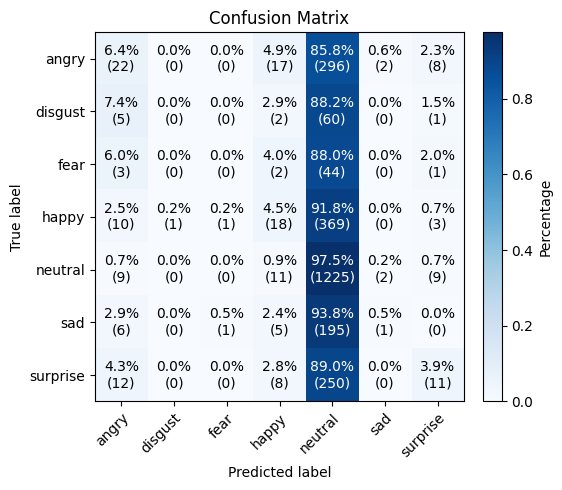

In [34]:
best_model = load('rf_ERCM_FS.joblib')
y_pred = best_model.predict(meld_feats)
print(classification_report(meld['label'], y_pred))
plot_confusion_matrix(meld['label'], y_pred)

              precision    recall  f1-score   support

       angry       0.89      0.35      0.50      1103
     disgust       0.00      0.50      0.00         2
        fear       0.02      0.20      0.03        40
       happy       0.17      0.17      0.17       595
     neutral       0.66      0.25      0.37      1708
         sad       0.48      0.55      0.51      1084
    surprise       0.50      0.01      0.02       107

    accuracy                           0.33      4639
   macro avg       0.39      0.29      0.23      4639
weighted avg       0.60      0.33      0.40      4639



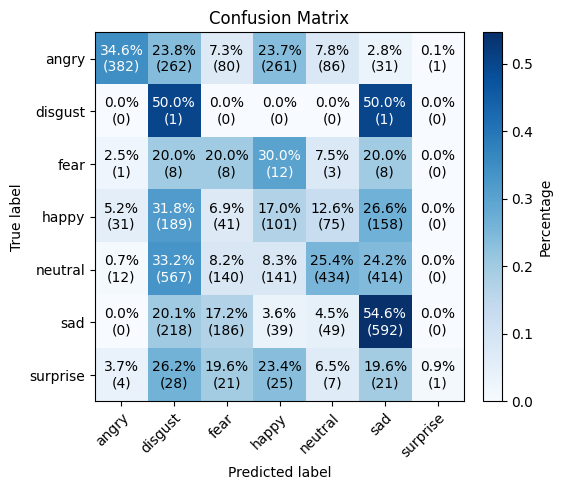

In [41]:
best_model = load('svm_ERC_FS.joblib')
y_pred = best_model.predict(iemocap_feats)
print(classification_report(iemocap['label'], y_pred))
plot_confusion_matrix(iemocap['label'], y_pred)

              precision    recall  f1-score   support

       angry       0.49      0.46      0.47       345
     disgust       0.18      0.25      0.21        68
        fear       0.19      0.44      0.27        50
       happy       0.52      0.65      0.58       402
     neutral       0.78      0.59      0.67      1256
         sad       0.42      0.41      0.41       208
    surprise       0.37      0.56      0.44       281

    accuracy                           0.55      2610
   macro avg       0.42      0.48      0.44      2610
weighted avg       0.60      0.55      0.57      2610



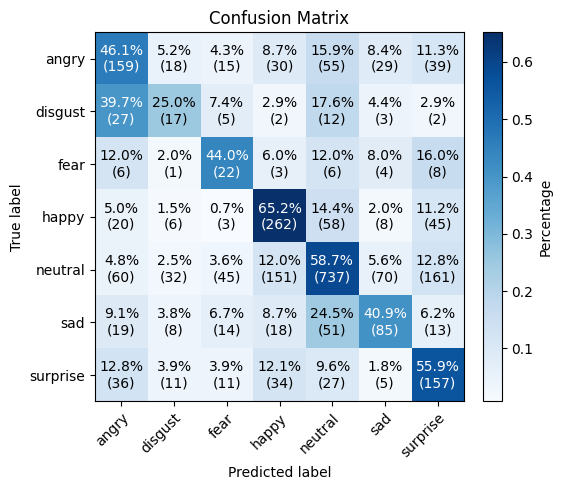

In [9]:
meld['final_pred'] = [decision_fuse(t, s) for t, s in zip(llm_preds['pred_gemma2'], y_pred)]
print(classification_report(meld['label'], meld['final_pred']))
plot_confusion_matrix(meld['label'], meld['final_pred'])

              precision    recall  f1-score   support

       angry       0.44      0.43      0.43       345
     disgust       0.16      0.22      0.19        68
        fear       0.17      0.36      0.23        50
       happy       0.50      0.63      0.56       402
     neutral       0.78      0.59      0.67      1256
         sad       0.41      0.39      0.40       208
    surprise       0.37      0.54      0.44       281

    accuracy                           0.54      2610
   macro avg       0.40      0.45      0.42      2610
weighted avg       0.59      0.54      0.55      2610



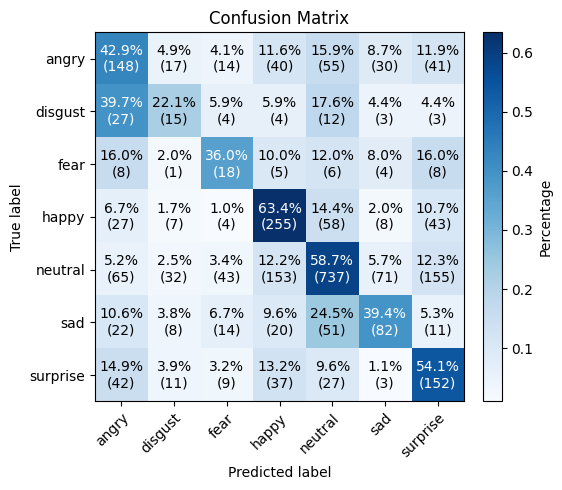

In [10]:
def decision_fuse2(text_pred, speech_pred):
    if speech_pred == 'neutral' and text_pred != 'neutral':
        return text_pred
    elif speech_pred == text_pred:
        return speech_pred
    elif text_pred == 'neutral' and speech_pred != 'neutral':
        return speech_pred
    else:
        return speech_pred

meld['final_pred2'] = [decision_fuse2(t, s) for t, s in zip(llm_preds['pred_gemma2'], y_pred)]
print(classification_report(meld['label'], meld['final_pred2']))
plot_confusion_matrix(meld['label'], meld['final_pred2'])

              precision    recall  f1-score   support

       angry       0.36      0.08      0.13       345
     disgust       0.00      0.00      0.00        68
        fear       0.00      0.00      0.00        50
       happy       0.12      0.01      0.03       402
     neutral       0.50      0.98      0.66      1256
         sad       0.00      0.00      0.00       208
    surprise       0.42      0.04      0.07       281

    accuracy                           0.49      2610
   macro avg       0.20      0.16      0.13      2610
weighted avg       0.35      0.49      0.35      2610



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

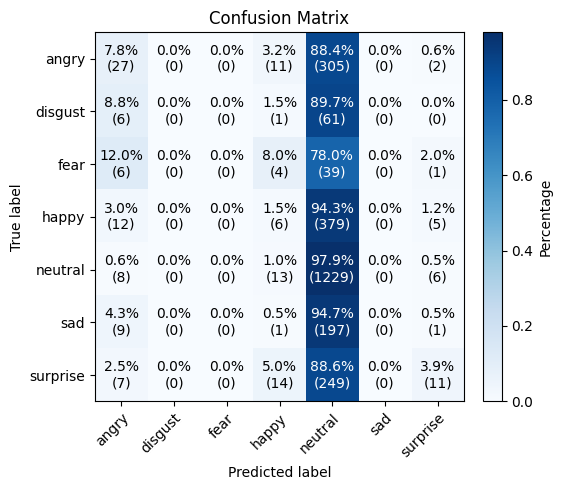

In [31]:
best_model = load('rf_MELD.joblib')
y_pred = best_model.predict(meld_feats)
print(classification_report(meld['label'], y_pred))
plot_confusion_matrix(meld['label'], y_pred)

In [32]:
y_pred = best_model.predict(iemocap_feats)
print(classification_report(iemocap['label'], y_pred))
plot_confusion_matrix(iemocap['label'], y_pred)

NameError: name 'iemocap_feats' is not defined

              precision    recall  f1-score   support

       angry       0.48      0.46      0.47       345
     disgust       0.18      0.25      0.21        68
        fear       0.19      0.44      0.27        50
       happy       0.52      0.65      0.58       402
     neutral       0.78      0.59      0.67      1256
         sad       0.42      0.41      0.41       208
    surprise       0.37      0.56      0.45       281

    accuracy                           0.55      2610
   macro avg       0.42      0.48      0.44      2610
weighted avg       0.60      0.55      0.57      2610



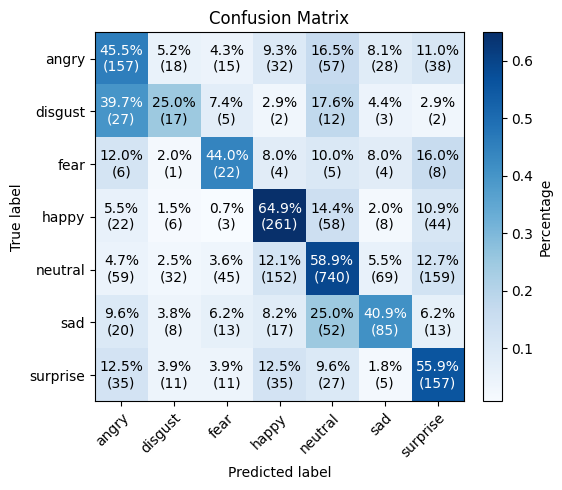

In [17]:
meld['final_pred_meld'] = [decision_fuse(t, s) for t, s in zip(llm_preds['pred_gemma2'], y_pred)]
print(classification_report(meld['label'], meld['final_pred_meld']))
plot_confusion_matrix(meld['label'], meld['final_pred_meld'])

              precision    recall  f1-score   support

       angry       0.49      0.44      0.46       345
     disgust       0.18      0.25      0.21        68
        fear       0.19      0.44      0.27        50
       happy       0.53      0.65      0.58       402
     neutral       0.77      0.60      0.67      1256
         sad       0.42      0.41      0.41       208
    surprise       0.38      0.56      0.45       281

    accuracy                           0.55      2610
   macro avg       0.42      0.48      0.44      2610
weighted avg       0.60      0.55      0.57      2610



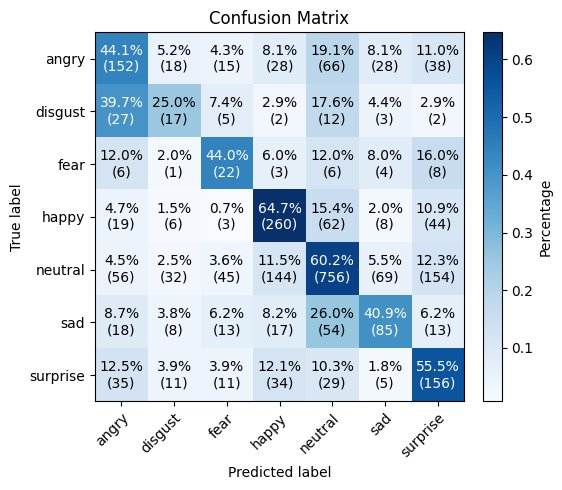

In [15]:
print(classification_report(meld['label'], llm_preds['pred_gemma2']))
plot_confusion_matrix(meld['label'], llm_preds['pred_gemma2'])

              precision    recall  f1-score   support

       angry       0.16      0.56      0.25       345
     disgust       0.02      0.16      0.04        68
        fear       0.02      0.12      0.03        50
       happy       0.15      0.08      0.10       402
     neutral       0.51      0.03      0.06      1256
         sad       0.09      0.12      0.11       208
    surprise       0.00      0.00      0.00       281

    accuracy                           0.12      2610
   macro avg       0.14      0.15      0.08      2610
weighted avg       0.30      0.12      0.09      2610



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

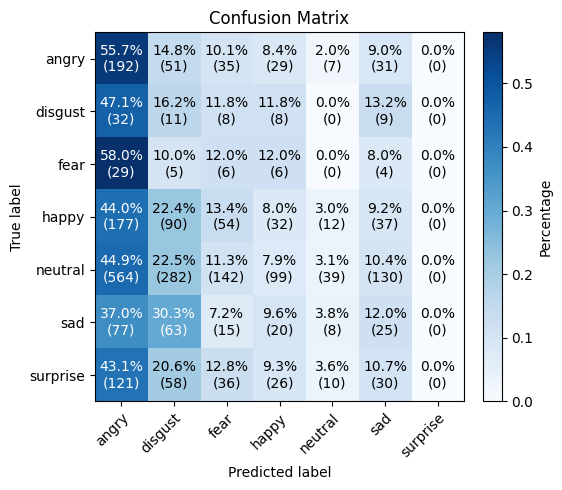

In [23]:
best_model = load('logreg_E.joblib')
y_pred = best_model.predict(meld_feats)
print(classification_report(meld['label'], y_pred))
plot_confusion_matrix(meld['label'], y_pred)

              precision    recall  f1-score   support

       angry       0.17      0.53      0.26       345
     disgust       0.02      0.18      0.03        68
        fear       0.02      0.12      0.04        50
       happy       0.18      0.12      0.14       402
     neutral       0.49      0.06      0.11      1256
         sad       0.09      0.10      0.09       208
    surprise       0.00      0.00      0.00       281

    accuracy                           0.13      2610
   macro avg       0.14      0.16      0.10      2610
weighted avg       0.30      0.13      0.12      2610



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

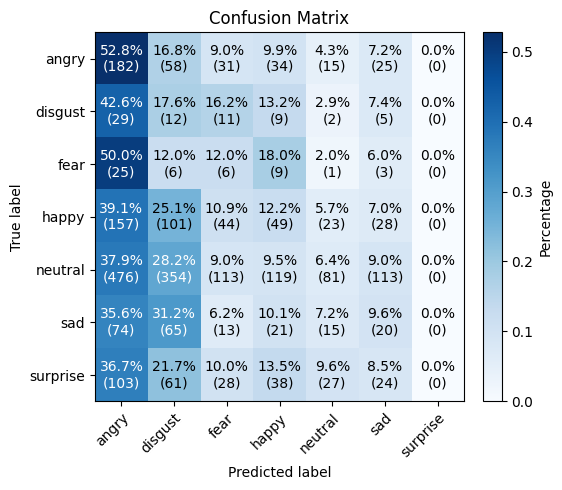

In [24]:
best_model = load('logreg_E_FS.joblib')
y_pred = best_model.predict(meld_feats)
print(classification_report(meld['label'], y_pred))
plot_confusion_matrix(meld['label'], y_pred)

              precision    recall  f1-score   support

       angry       0.14      0.47      0.21       345
     disgust       0.02      0.13      0.04        68
        fear       0.02      0.02      0.02        50
       happy       0.15      0.26      0.19       402
     neutral       0.45      0.05      0.09      1256
         sad       0.08      0.06      0.07       208
    surprise       0.00      0.00      0.00       281

    accuracy                           0.13      2610
   macro avg       0.12      0.14      0.09      2610
weighted avg       0.26      0.13      0.11      2610



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

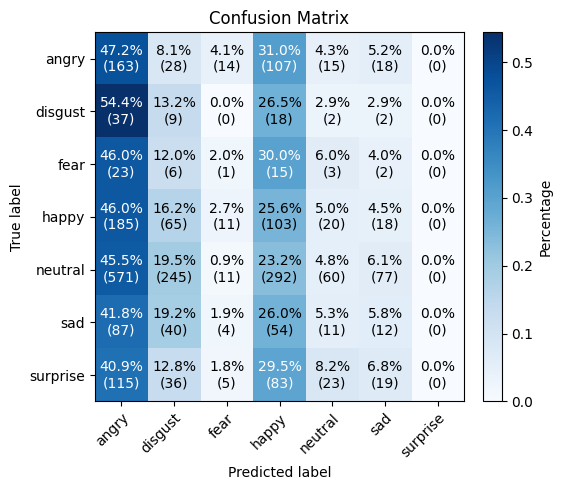

In [27]:
best_model = load('rf_C_FS.joblib')
y_pred = best_model.predict(meld_feats)
print(classification_report(meld['label'], y_pred))
plot_confusion_matrix(meld['label'], y_pred)

              precision    recall  f1-score   support

       angry       0.16      0.44      0.24       345
     disgust       0.04      0.22      0.07        68
        fear       0.07      0.04      0.05        50
       happy       0.26      0.54      0.35       402
     neutral       0.53      0.04      0.08      1256
         sad       0.25      0.38      0.30       208
    surprise       0.00      0.00      0.00       281

    accuracy                           0.20      2610
   macro avg       0.19      0.24      0.15      2610
weighted avg       0.34      0.20      0.15      2610



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

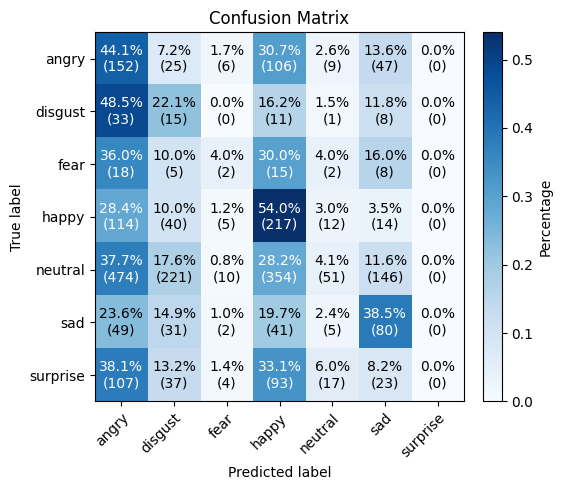

In [28]:
meld['final_pred4'] = [decision_fuse(t, s) for t, s in zip(llm_preds['pred_qwen'], y_pred)]
print(classification_report(meld['label'], meld['final_pred4']))
plot_confusion_matrix(meld['label'], meld['final_pred4'])

              precision    recall  f1-score   support

       angry       0.27      0.55      0.36       345
     disgust       0.05      0.25      0.08        68
        fear       0.11      0.46      0.18        50
       happy       0.47      0.68      0.55       402
     neutral       0.84      0.04      0.08      1256
         sad       0.31      0.43      0.36       208
    surprise       0.38      0.56      0.45       281

    accuracy                           0.31      2610
   macro avg       0.35      0.42      0.29      2610
weighted avg       0.58      0.31      0.25      2610



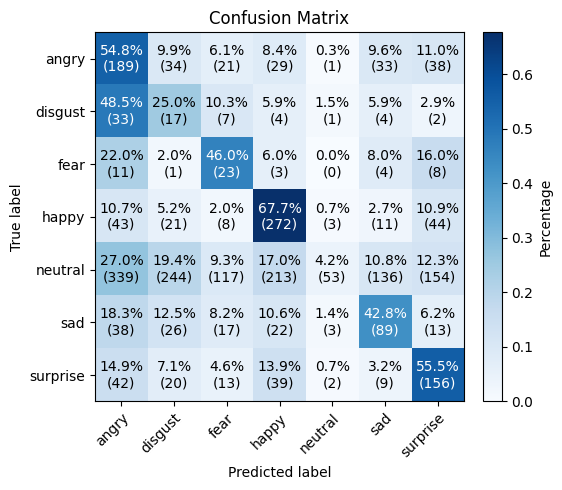

In [25]:
meld['final_pred4'] = [decision_fuse(t, s) for t, s in zip(llm_preds['pred_gemma2'], y_pred)]
print(classification_report(meld['label'], meld['final_pred4']))
plot_confusion_matrix(meld['label'], meld['final_pred4'])

In [ ]:
best_model = load('svm_ER_FS.joblib')
y_pred = best_model.predict(meld_feats)
print(classification_report(meld['label'], y_pred))
plot_confusion_matrix(meld['label'], y_pred)

              precision    recall  f1-score   support

       angry       0.22      0.17      0.19       345
     disgust       0.02      0.12      0.04        68
        fear       0.03      0.14      0.05        50
       happy       0.12      0.07      0.09       402
     neutral       0.50      0.03      0.05      1256
         sad       0.08      0.52      0.14       208
    surprise       0.00      0.00      0.00       281

    accuracy                           0.09      2610
   macro avg       0.14      0.15      0.08      2610
weighted avg       0.29      0.09      0.08      2610



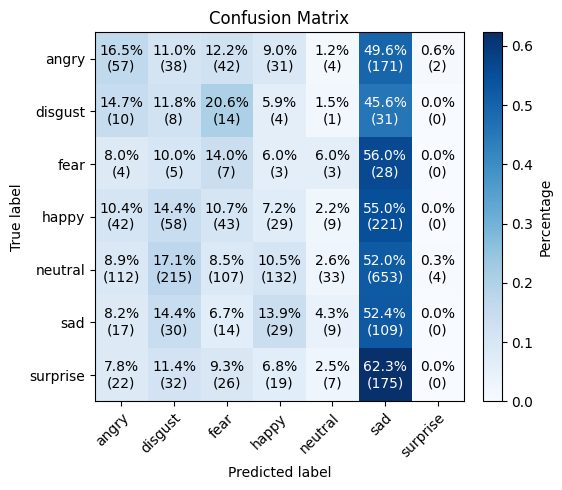

In [18]:
best_model = load('svm_ER_FS.joblib')
y_pred = best_model.predict(meld_feats)
print(classification_report(meld['label'], y_pred))
plot_confusion_matrix(meld['label'], y_pred)

              precision    recall  f1-score   support

       angry       0.22      0.17      0.19       345
     disgust       0.02      0.12      0.04        68
        fear       0.04      0.18      0.06        50
       happy       0.13      0.09      0.11       402
     neutral       0.70      0.01      0.02      1256
         sad       0.08      0.55      0.14       208
    surprise       0.29      0.02      0.03       281

    accuracy                           0.09      2610
   macro avg       0.21      0.16      0.08      2610
weighted avg       0.43      0.09      0.07      2610



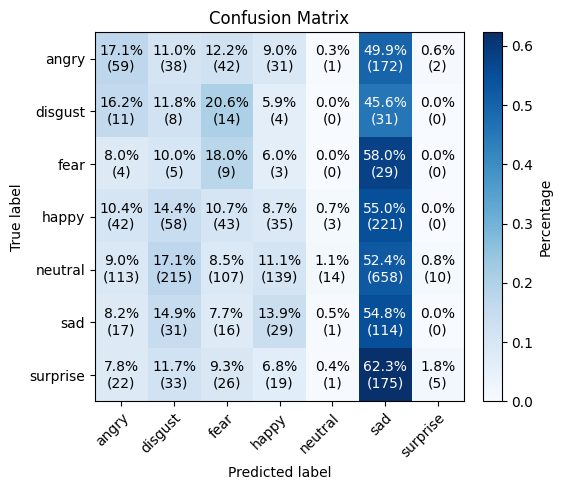

In [20]:
meld['final_pred3'] = [decision_fuse2(t, s) for t, s in zip(llm_preds['pred_gemma2'], y_pred)]
print(classification_report(meld['label'], meld['final_pred3']))
plot_confusion_matrix(meld['label'], meld['final_pred3'])

              precision    recall  f1-score   support

       angry       0.38      0.05      0.09       345
     disgust       0.00      0.00      0.00        68
        fear       0.00      0.00      0.00        50
       happy       0.12      0.00      0.00       402
     neutral       0.49      0.98      0.65      1256
         sad       0.25      0.01      0.02       208
    surprise       0.33      0.02      0.03       281

    accuracy                           0.48      2610
   macro avg       0.22      0.15      0.11      2610
weighted avg       0.36      0.48      0.33      2610



/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krazmic/Documents/GitHub/Repos/EmoReA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

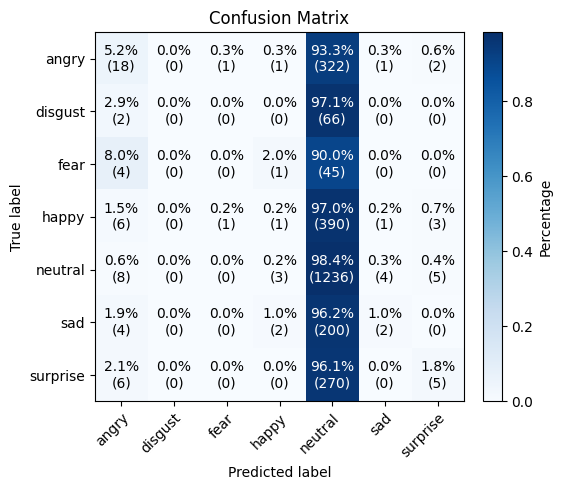

In [29]:
best_model = load('svm_RTMI_FS.joblib')
y_pred = best_model.predict(meld_feats)
print(classification_report(meld['label'], y_pred))
plot_confusion_matrix(meld['label'], y_pred)